# Parameter Sweep IDW Toy Model
To evaluate model accuracy, we have to test the model against observed data. Often, it's not possible to have separate test/train datasets. This notebook illustrates how to perform exhaustive an alpha parameter sweep. This could be used with modification to develop leave-one-out cross validation routine [described here](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

Input data are toy data to keep things simple.

In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

In [2]:
data = pd.DataFrame([
    [8,5,1],
    [7,2,2],
    [6,2,4],
    [5,7,2],
    [6,7,5],
    [5,7,5],
    [5,5,4],
    [8.5,5,1],
    [7.5,2,2],
    [6.5,2,4],
    [5.5,7,2],
    [6.5,7,5],
    [5.5,7,5],
    [5.5,5,4]
], columns=['x','y','value_z'])

In [3]:
data

x  y  value_z
0   8.0  5        1
1   7.0  2        2
2   6.0  2        4
3   5.0  7        2
4   6.0  7        5
5   5.0  7        5
6   5.0  5        4
7   8.5  5        1
8   7.5  2        2
9   6.5  2        4
10  5.5  7        2
11  6.5  7        5
12  5.5  7        5
13  5.5  5        4

/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='x', ylabel='y'>

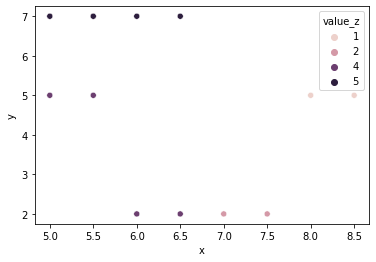

In [4]:
sns.scatterplot(data['x'], data['y'], hue=data['value_z'])

# Estimate Inverse Distance Weight
Using an alpha $\alpha=2$.


In [5]:
def distance(x0,y0,x1,y1):
    return math.sqrt((x0-x1)**2 + (y0-y1)**2)

distances = []
threshold = 10000 # if you wanted to set a distance threshold

# create distance matrix
for i in range(0, len(data)):
    uid0 = data.index.tolist()[i]
    x0 = data.iloc[i]['x']
    y0 = data.iloc[i]['y']
    
    for j in range(0, len(data)):
        uidj = data.index.tolist()[j]
        xj = data.iloc[j]['x']
        yj = data.iloc[j]['y']
        
        
        distance_0j = distance(x0,y0,xj,yj)
        
        if distance_0j < threshold:        
            distances.append([uid0,uidj,distance_0j])
        

In [6]:
distances = pd.DataFrame(distances, columns=['uid0', 'uidj', 'distance'])

In [7]:
distances.head()

uid0  uidj  distance
0     0     0  0.000000
1     0     1  3.162278
2     0     2  3.605551
3     0     3  3.605551
4     0     4  2.828427

In [8]:
# get rid of self-distance estimates
distances = distances[distances['distance']>0] 

In [9]:
distances['inverse_distance_alpha2'] = 1/(distances['distance']**2)

In [10]:
distances.head()

uid0  uidj  distance  inverse_distance_alpha2
1     0     1  3.162278                 0.100000
2     0     2  3.605551                 0.076923
3     0     3  3.605551                 0.076923
4     0     4  2.828427                 0.125000
5     0     5  3.605551                 0.076923

In [11]:
weights_matrix = pd.pivot_table(distances, values='inverse_distance_alpha2',index='uid0',columns='uidj')

In [12]:
weights_matrix

uidj        0         1         2         3         4         5         6   \
uid0                                                                         
0          NaN  0.100000  0.076923  0.076923  0.125000  0.076923  0.111111   
1     0.100000       NaN  1.000000  0.034483  0.038462  0.034483  0.076923   
2     0.076923  1.000000       NaN  0.038462  0.040000  0.038462  0.100000   
3     0.076923  0.034483  0.038462       NaN  1.000000       NaN  0.250000   
4     0.125000  0.038462  0.040000  1.000000       NaN  1.000000  0.200000   
5     0.076923  0.034483  0.038462       NaN  1.000000       NaN  0.250000   
6     0.111111  0.076923  0.100000  0.250000  0.200000  0.250000       NaN   
7     4.000000  0.088889  0.065574  0.061538  0.097561  0.061538  0.081633   
8     0.108108  4.000000  0.444444  0.032000  0.036697  0.032000  0.065574   
9     0.088889  4.000000  4.000000  0.036697  0.039604  0.036697  0.088889   
10    0.097561  0.036697  0.039604  4.000000  4.000000  4.000000  0.235294   
11    0.160000  0.039604  0.039604  0.444444  4.000000  0.444444  0.160000   
12    0.097561  0.036697  0.039604  4.000000  4.000000  4.000000  0.235294   
13    0.160000  0.088889  0.108108  0.235294  0.235294  0.235294  4.000000   

uidj        7         8         9         10        11        12        13  
uid0                                                                        
0     4.000000  0.108108  0.088889  0.097561  0.160000  0.097561  0.160000  
1     0.088889  4.000000  4.000000  0.036697  0.039604  0.036697  0.088889  
2     0.065574  0.444444  4.000000  0.039604  0.039604  0.039604  0.108108  
3     0.061538  0.032000  0.036697  4.000000  0.444444  4.000000  0.235294  
4     0.097561  0.036697  0.039604  4.000000  4.000000  4.000000  0.235294  
5     0.061538  0.032000  0.036697  4.000000  0.444444  4.000000  0.235294  
6     0.081633  0.065574  0.088889  0.235294  0.160000  0.235294  4.000000  
7          NaN  0.100000  0.076923  0.076923  0.125000  0.076923  0.111111  
8     0.100000       NaN  1.000000  0.034483  0.038462  0.034483  0.076923  
9     0.076923  1.000000       NaN  0.038462  0.040000  0.038462  0.100000  
10    0.076923  0.034483  0.038462       NaN  1.000000       NaN  0.250000  
11    0.125000  0.038462  0.040000  1.000000       NaN  1.000000  0.200000  
12    0.076923  0.034483  0.038462       NaN  1.000000       NaN  0.250000  
13    0.111111  0.076923  0.100000  0.250000  0.200000  0.250000       NaN

In [13]:
data_and_weights = data.join(weights_matrix)

In [14]:
data_and_weights

x  y  value_z         0         1         2         3         4  \
0   8.0  5        1       NaN  0.100000  0.076923  0.076923  0.125000   
1   7.0  2        2  0.100000       NaN  1.000000  0.034483  0.038462   
2   6.0  2        4  0.076923  1.000000       NaN  0.038462  0.040000   
3   5.0  7        2  0.076923  0.034483  0.038462       NaN  1.000000   
4   6.0  7        5  0.125000  0.038462  0.040000  1.000000       NaN   
5   5.0  7        5  0.076923  0.034483  0.038462       NaN  1.000000   
6   5.0  5        4  0.111111  0.076923  0.100000  0.250000  0.200000   
7   8.5  5        1  4.000000  0.088889  0.065574  0.061538  0.097561   
8   7.5  2        2  0.108108  4.000000  0.444444  0.032000  0.036697   
9   6.5  2        4  0.088889  4.000000  4.000000  0.036697  0.039604   
10  5.5  7        2  0.097561  0.036697  0.039604  4.000000  4.000000   
11  6.5  7        5  0.160000  0.039604  0.039604  0.444444  4.000000   
12  5.5  7        5  0.097561  0.036697  0.039604  4.000000  4.000000   
13  5.5  5        4  0.160000  0.088889  0.108108  0.235294  0.235294   

           5         6         7         8         9        10        11  \
0   0.076923  0.111111  4.000000  0.108108  0.088889  0.097561  0.160000   
1   0.034483  0.076923  0.088889  4.000000  4.000000  0.036697  0.039604   
2   0.038462  0.100000  0.065574  0.444444  4.000000  0.039604  0.039604   
3        NaN  0.250000  0.061538  0.032000  0.036697  4.000000  0.444444   
4   1.000000  0.200000  0.097561  0.036697  0.039604  4.000000  4.000000   
5        NaN  0.250000  0.061538  0.032000  0.036697  4.000000  0.444444   
6   0.250000       NaN  0.081633  0.065574  0.088889  0.235294  0.160000   
7   0.061538  0.081633       NaN  0.100000  0.076923  0.076923  0.125000   
8   0.032000  0.065574  0.100000       NaN  1.000000  0.034483  0.038462   
9   0.036697  0.088889  0.076923  1.000000       NaN  0.038462  0.040000   
10  4.000000  0.235294  0.076923  0.034483  0.038462       NaN  1.000000   
11  0.444444  0.160000  0.125000  0.038462  0.040000  1.000000       NaN   
12  4.000000  0.235294  0.076923  0.034483  0.038462       NaN  1.000000   
13  0.235294  4.000000  0.111111  0.076923  0.100000  0.250000  0.200000   

          12        13  
0   0.097561  0.160000  
1   0.036697  0.088889  
2   0.039604  0.108108  
3   4.000000  0.235294  
4   4.000000  0.235294  
5   4.000000  0.235294  
6   0.235294  4.000000  
7   0.076923  0.111111  
8   0.034483  0.076923  
9   0.038462  0.100000  
10       NaN  0.250000  
11  1.000000  0.200000  
12       NaN  0.250000  
13  0.250000       NaN

In [15]:
data_and_weights = data_and_weights.reset_index()

In [16]:
data_and_weights

index    x  y  value_z         0         1         2         3         4  \
0       0  8.0  5        1       NaN  0.100000  0.076923  0.076923  0.125000   
1       1  7.0  2        2  0.100000       NaN  1.000000  0.034483  0.038462   
2       2  6.0  2        4  0.076923  1.000000       NaN  0.038462  0.040000   
3       3  5.0  7        2  0.076923  0.034483  0.038462       NaN  1.000000   
4       4  6.0  7        5  0.125000  0.038462  0.040000  1.000000       NaN   
5       5  5.0  7        5  0.076923  0.034483  0.038462       NaN  1.000000   
6       6  5.0  5        4  0.111111  0.076923  0.100000  0.250000  0.200000   
7       7  8.5  5        1  4.000000  0.088889  0.065574  0.061538  0.097561   
8       8  7.5  2        2  0.108108  4.000000  0.444444  0.032000  0.036697   
9       9  6.5  2        4  0.088889  4.000000  4.000000  0.036697  0.039604   
10     10  5.5  7        2  0.097561  0.036697  0.039604  4.000000  4.000000   
11     11  6.5  7        5  0.160000  0.039604  0.039604  0.444444  4.000000   
12     12  5.5  7        5  0.097561  0.036697  0.039604  4.000000  4.000000   
13     13  5.5  5        4  0.160000  0.088889  0.108108  0.235294  0.235294   

           5         6         7         8         9        10        11  \
0   0.076923  0.111111  4.000000  0.108108  0.088889  0.097561  0.160000   
1   0.034483  0.076923  0.088889  4.000000  4.000000  0.036697  0.039604   
2   0.038462  0.100000  0.065574  0.444444  4.000000  0.039604  0.039604   
3        NaN  0.250000  0.061538  0.032000  0.036697  4.000000  0.444444   
4   1.000000  0.200000  0.097561  0.036697  0.039604  4.000000  4.000000   
5        NaN  0.250000  0.061538  0.032000  0.036697  4.000000  0.444444   
6   0.250000       NaN  0.081633  0.065574  0.088889  0.235294  0.160000   
7   0.061538  0.081633       NaN  0.100000  0.076923  0.076923  0.125000   
8   0.032000  0.065574  0.100000       NaN  1.000000  0.034483  0.038462   
9   0.036697  0.088889  0.076923  1.000000       NaN  0.038462  0.040000   
10  4.000000  0.235294  0.076923  0.034483  0.038462       NaN  1.000000   
11  0.444444  0.160000  0.125000  0.038462  0.040000  1.000000       NaN   
12  4.000000  0.235294  0.076923  0.034483  0.038462       NaN  1.000000   
13  0.235294  4.000000  0.111111  0.076923  0.100000  0.250000  0.200000   

          12        13  
0   0.097561  0.160000  
1   0.036697  0.088889  
2   0.039604  0.108108  
3   4.000000  0.235294  
4   4.000000  0.235294  
5   4.000000  0.235294  
6   0.235294  4.000000  
7   0.076923  0.111111  
8   0.034483  0.076923  
9   0.038462  0.100000  
10       NaN  0.250000  
11  1.000000  0.200000  
12       NaN  0.250000  
13  0.250000       NaN

In [17]:
data['value_z_prediction']=0
data['value_z_prediction']+data_and_weights[0].fillna(0)*data_and_weights['value_z'].iloc[0]

for i in range(1, len(data_and_weights)):
    data['value_z_prediction'] = data['value_z_prediction']+data_and_weights[i].fillna(0)*data_and_weights['value_z'].iloc[i]
    
data['value_z_prediction']=data['value_z_prediction']/data_and_weights.fillna(0)[[i for i in range(0,14)]].sum(axis=1)

In [18]:
data

x  y  value_z  value_z_prediction
0   8.0  5        1            1.668933
1   7.0  2        2            3.095596
2   6.0  2        4            3.437592
3   5.0  7        2            3.688455
4   6.0  7        5            3.868828
5   5.0  7        5            3.688455
6   5.0  5        4            3.812180
7   8.5  5        1            0.756582
8   7.5  2        2            2.546809
9   6.5  2        4            2.895952
10  5.5  7        2            4.017136
11  6.5  7        5            4.179993
12  5.5  7        5            4.017136
13  5.5  5        4            3.776074

/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='value_z', ylabel='value_z_prediction'>

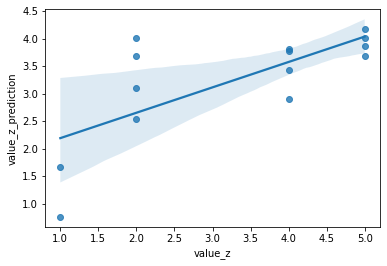

In [19]:
sns.regplot(data['value_z'],data['value_z_prediction'])

In [20]:
scipy.stats.linregress(data['value_z'],data['value_z_prediction'])

LinregressResult(slope=0.46167462793699926, intercept=1.7294776746009866, rvalue=0.7168824432480176, pvalue=0.003909977073779234, stderr=0.12961376348780054)

In [21]:
rmse = math.sqrt(((data['value_z_prediction'] - data['value_z'])**2).sum()/len(data))

In [22]:
rmse

1.0414464360572306

# Alpha Parameter Sweep
Here, we do a parameter sweep of Alpha. This is one way to select the best alpha.

/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


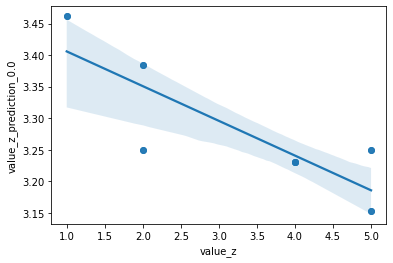

ALPHA: 0.0
LinregressResult(slope=-0.055021367521367555, intercept=3.461004273504274, rvalue=-0.8383131547435031, pvalue=0.00018034750864586333, stderr=0.01032955392828121)
RMSE: 1.567210777021125


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


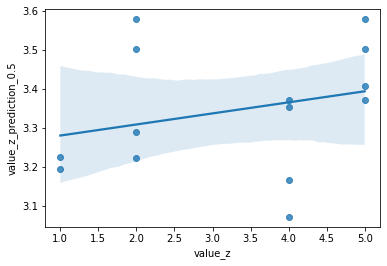

ALPHA: 0.5
LinregressResult(slope=0.02834288581486375, intercept=3.253099909022014, rvalue=0.2758451088673141, pvalue=0.3397855636466487, stderr=0.02851037089405409)
RMSE: 1.4512314423894648


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


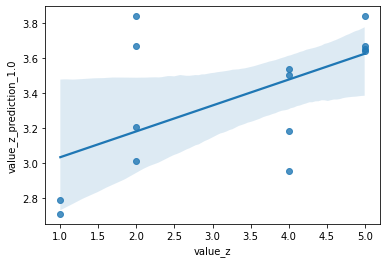

ALPHA: 1.0
LinregressResult(slope=0.14778316474913508, intercept=2.8843502464547126, rvalue=0.5879437927366785, pvalue=0.027015425596990605, stderr=0.058694083205602716)
RMSE: 1.30344695420798


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


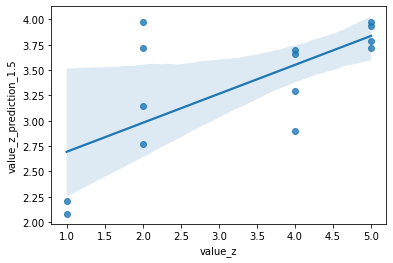

ALPHA: 1.5
LinregressResult(slope=0.2859704481215348, intercept=2.4083274856151933, rvalue=0.68966272475277, pvalue=0.006349997416009694, stderr=0.08667837529189337)
RMSE: 1.1516564338181439


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


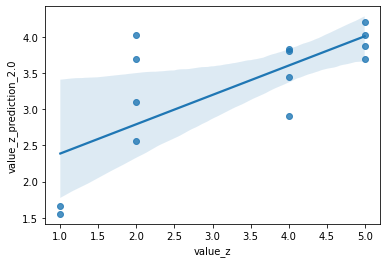

ALPHA: 2.0
LinregressResult(slope=0.40489699455271677, intercept=1.9839313669872618, rvalue=0.7293981332292738, pvalue=0.0030718470297008515, stderr=0.10962312284219895)
RMSE: 1.0484422698771516


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


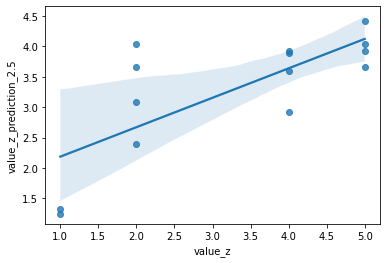

ALPHA: 2.5
LinregressResult(slope=0.4836044039091917, intercept=1.7038808932571368, rvalue=0.7471344037959017, pvalue=0.002133619447465543, stderr=0.12419637482373679)
RMSE: 0.9978827140134467


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


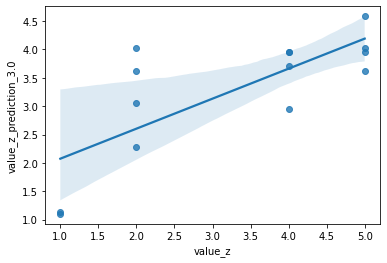

ALPHA: 3.0
LinregressResult(slope=0.528845044668839, intercept=1.5463366426960956, rvalue=0.756591497871424, pvalue=0.0017359157452498755, stderr=0.1319409539525238)
RMSE: 0.9745333830445435


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


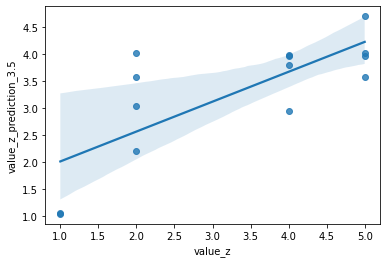

ALPHA: 3.5
LinregressResult(slope=0.554114774904054, intercept=1.4608739765761605, rvalue=0.7621055663584195, pvalue=0.0015327754947994105, stderr=0.1358945611000351)
RMSE: 0.9626323340001973


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


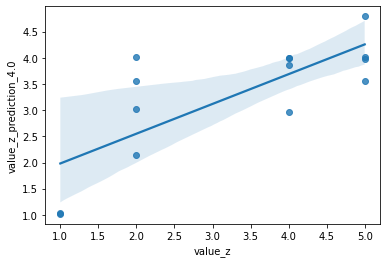

ALPHA: 4.0
LinregressResult(slope=0.568691368161926, intercept=1.4130174985925092, rvalue=0.7654262486814546, pvalue=0.0014198772909565325, stderr=0.1380216320110161)
RMSE: 0.9559751147204327


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


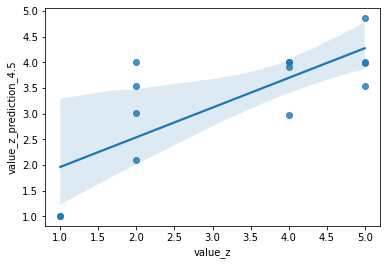

ALPHA: 4.5
LinregressResult(slope=0.5775327479585088, intercept=1.3847183825705114, rvalue=0.7674675994378778, pvalue=0.0013538291167345669, stderr=0.13926545762124648)
RMSE: 0.9520332442311353


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


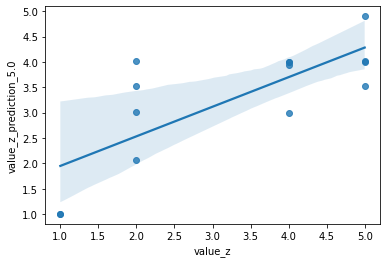

ALPHA: 5.0
LinregressResult(slope=0.583147096100309, intercept=1.3670896207407761, rvalue=0.7687509905648101, pvalue=0.0013135738986365928, stderr=0.1400474141869166)
RMSE: 0.9496067638408635


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


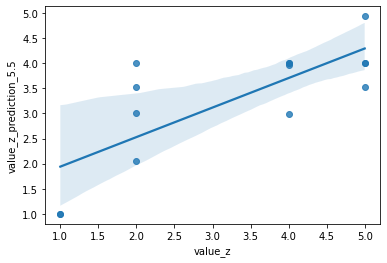

ALPHA: 5.5
LinregressResult(slope=0.5868371695006347, intercept=1.3556553665500248, rvalue=0.7695772969893117, pvalue=0.0012881644878501967, stderr=0.1405633651307656)
RMSE: 0.9480656895231745


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


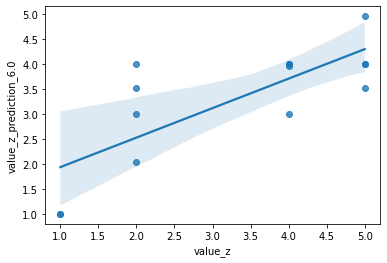

ALPHA: 6.0
LinregressResult(slope=0.5893202266975047, intercept=1.348027088690776, rvalue=0.77012124859485, pvalue=0.001271652548037817, stderr=0.1409134800184422)
RMSE: 0.9470610276167911


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


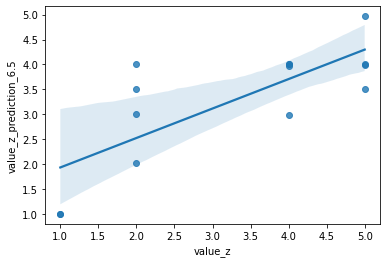

ALPHA: 6.5
LinregressResult(slope=0.5910169940664008, intercept=1.3428422469737662, rvalue=0.7704860797891394, pvalue=0.001260672732500873, stderr=0.1411546932770743)
RMSE: 0.9463920192605424


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


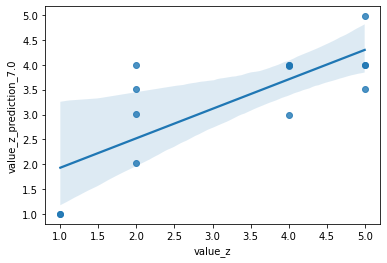

ALPHA: 7.0
LinregressResult(slope=0.5921880648146758, intercept=1.3392753698327138, rvalue=0.7707343887970304, pvalue=0.001253243035926564, stderr=0.1413222228620023)
RMSE: 0.9459391033103338


/home/iaa/runck014/.conda/envs/winterturf_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


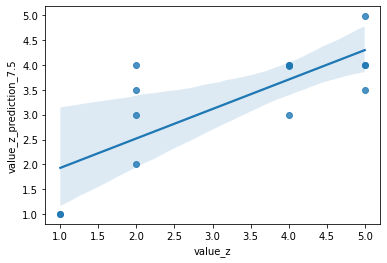

ALPHA: 7.5
LinregressResult(slope=0.5930015925519379, intercept=1.3368022439744547, rvalue=0.7709052593806602, pvalue=0.001248150690798695, stderr=0.14143908935718508)
RMSE: 0.9456286531834177


In [34]:
model_intercomparison = []
for alpha in [x / 10.0 for x in range(0, 80, 5)]:
    predict_key = 'value_z_prediction_{}'.format(alpha)

    distances['inverse_distance_alpha{}'.format(alpha)] = 1/(distances['distance']**alpha)
    weights_matrix = pd.pivot_table(distances, values='inverse_distance_alpha{}'.format(alpha),index='uid0',columns='uidj')
    
    data_and_weights = data.join(weights_matrix)
    
    data[predict_key]=0
    data[predict_key]=data_and_weights[0].fillna(0)*data_and_weights['value_z'].iloc[0]

    for i in range(1, len(data_and_weights)):
        data[predict_key] = data[predict_key]+data_and_weights[i].fillna(0)*data_and_weights['value_z'].iloc[i]

    data[predict_key]=data[predict_key]/data_and_weights.fillna(0)[[i for i in range(0,14)]].sum(axis=1)
    
    sns.regplot(data['value_z'],data[predict_key])
    plt.show()
    lm_metrics = scipy.stats.linregress(data['value_z'],data[predict_key])
    r_2 = lm_metrics.rvalue
    rmse = math.sqrt(((data[predict_key] - data['value_z'])**2).sum()/len(data))
    model_intercomparison.append([alpha, r_2, rmse])
    
    print('ALPHA:',alpha)
    print(lm_metrics)
    print('RMSE:', rmse)

In [39]:
model_intercomparison = pd.DataFrame(model_intercomparison, columns=['alpha', 'r2', 'RMSE'])

In [40]:
model_intercomparison

alpha        r2      RMSE
0     0.0 -0.838313  1.567211
1     0.5  0.275845  1.451231
2     1.0  0.587944  1.303447
3     1.5  0.689663  1.151656
4     2.0  0.729398  1.048442
5     2.5  0.747134  0.997883
6     3.0  0.756591  0.974533
7     3.5  0.762106  0.962632
8     4.0  0.765426  0.955975
9     4.5  0.767468  0.952033
10    5.0  0.768751  0.949607
11    5.5  0.769577  0.948066
12    6.0  0.770121  0.947061
13    6.5  0.770486  0.946392
14    7.0  0.770734  0.945939
15    7.5  0.770905  0.945629

In [43]:
model_intercomparison[model_intercomparison.r2==model_intercompariso.r2.max()]

alpha        r2      RMSE
15    7.5  0.770905  0.945629

In [45]:
model_intercomparison[model_intercomparison.RMSE==model_intercompariso.RMSE.min()]

alpha        r2      RMSE
15    7.5  0.770905  0.945629